# Box Office Revenue Prediction and Analysis

## Variables: 
 - Features (explanatory variables):
   log_budget, popularity, vote_average, vote_count, release_year, release_month, runtime
 - Target variable: revenue

## Machine Learning Models
 - `Linear Regression` - baseline linear model that assumes linear relationship between features and revenue.
 - `Random forest`- an ensemble* model that builds several decision trees on subsets that are randomized and then averages their predictions. This model reduces overfitting and also captures non-linear relationships.
 - `Gradient boosting` - also an ensemble model, this model builds trees sequentially where each new tree focus on correcting the errors of the previous tree. This model may sometimes be more powerful but compared to Random Forest it requires careful attention to the tuning of hyperparameters (i.e. the number of trees, depth and learning rate). 

### Content
 1. Introduction
 2. Data cleaning
 3. Feature Engineering
 4. Train test split
 5. Machine Learning models
 6. Future work

*ensemble = combines the predictions of several simpler models into one stronger and more accurate model. 

## 1. Introduction

### The purpose of this project is to explain and predict how movies become box office success in terms of movie revenue.

## 2. Data cleaning

In [14]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

# Data management
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set(style="whitegrid") # easy-to-read graphs
%matplotlib inline 

df = pd.read_csv("../data/tmdb_5000_movies.csv") # reads data from csv.file
df.head() # Shows the first five rows 

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## 2.1. The amount of missing values in every column 

In [15]:
df.isnull().sum().sort_values(ascending=False) 

homepage                3091
tagline                  844
overview                   3
runtime                    2
release_date               1
budget                     0
vote_average               0
title                      0
status                     0
spoken_languages           0
revenue                    0
production_countries       0
genres                     0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
vote_count                 0
dtype: int64

## 2.2. Revenue and profit

In [16]:
df['budget'] = df['budget'].replace(0, pd.NA) # replaces 0 for NA in budget
df['revenue'] = df['revenue'].replace(0, pd.NA) # replaces 0 for NA in revenue

df_clean = df.dropna(subset=['budget', 'revenue']).copy() # removes movies with no budget or no revenue

df_clean['profit'] = df_clean['revenue'] - df_clean['budget'] # create a new column with profit

df_clean['release_year'] = pd.to_datetime(df_clean['release_date'], errors='coerce').dt.year # extracts year from column release_date to illustrate movie name followed by year produced

## 2.3. These lines below prints out a scatterplot between budget and revenue

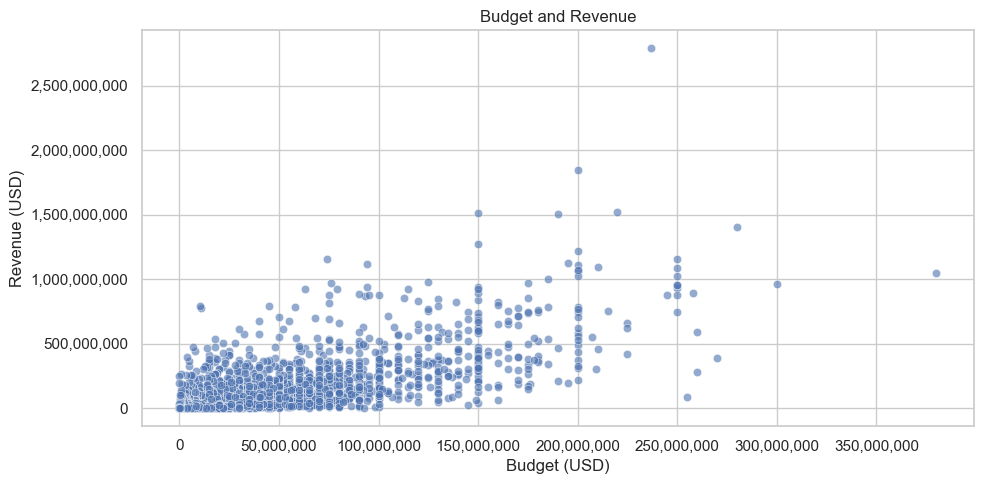

In [17]:
# these lines below prints out a scatterplot between budget and revenue
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_clean, x='budget', y='revenue', alpha=0.6)
plt.title('Budget and Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()

In [18]:
budget_threshold = df_clean['budget'].quantile(0.99) # threshold for what counts as an outlier
revenue_threshold = df_clean['revenue'].quantile(0.99)

outliers = df_clean[
    (df_clean['budget'] >= budget_threshold) |
    (df_clean['revenue'] >= revenue_threshold)
].copy()

outliers['release_year'] = df_clean.loc[outliers.index, 'release_year']

top_outliers = outliers.sort_values(by='budget', ascending=False).head(10).copy()

formatted_outliers = top_outliers[['title', 'budget', 'revenue', 'profit']].copy() 

for col in ['budget', 'revenue', 'profit']:
    formatted_outliers[col]= formatted_outliers[col].apply(lambda x: f"{int(x):,}") # format numbers with commas

formatted_outliers

,title,budget,revenue,profit
17,Pirates of the Caribbean: On Stranger Tides,"380,000,000","1,045,713,802","665,713,802"
1,Pirates of the Caribbean: At World's End,"300,000,000","961,000,000","661,000,000"
7,Avengers: Age of Ultron,"280,000,000","1,405,403,694","1,125,403,694"
10,Superman Returns,"270,000,000","391,081,192","121,081,192"
4,John Carter,"260,000,000","284,139,100","24,139,100"
6,Tangled,"260,000,000","591,794,936","331,794,936"
5,Spider-Man 3,"258,000,000","890,871,626","632,871,626"
13,The Lone Ranger,"255,000,000","89,289,910","-165,710,090"
22,The Hobbit: The Desolation of Smaug,"250,000,000","958,400,000","708,400,000"
26,Captain America: Civil War,"250,000,000","1,153,304,495","903,304,495"


## 2.4. Identify outliers in the scatterplot
### We will filtrate movies that have a very high budget or revenue by using the 99th percentile as a benchmark

## 2.6. Visualize budget versus revenue for the chosen titles

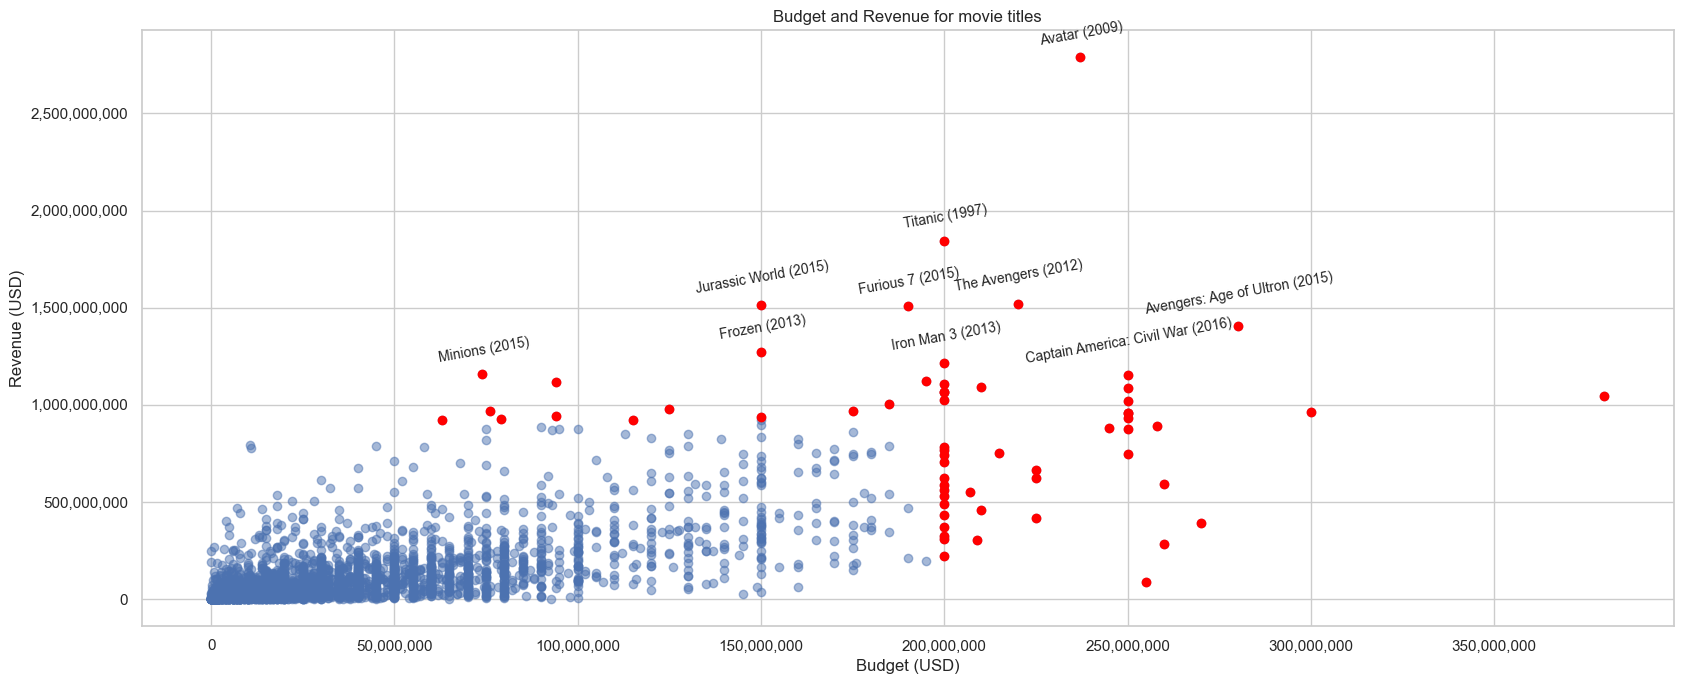

In [62]:
plt.figure(figsize=(17, 7))

outliers['revenue'] = (
    outliers['revenue']
    .replace(r'[\$,]', '', regex=True)
    .astype(float)  # converting revenue from object to float
)

outliers['budget'] = (
    outliers['budget']
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)

# scatterplot showing all movies
plt.scatter(df_clean['budget'], df_clean['revenue'], alpha=0.5) #show all movies

#highli
plt.scatter(outliers['budget'], outliers['revenue'], color='red')

#annotating only top 10 outliers in revenue
subset = outliers.nlargest(10, 'revenue')
for _, row in subset.iterrows():
    plt.annotate(
        f"{row['title']} ({int(row['release_year'])})" if pd.notnull(row['release_year']) else row ['title'],
        (row['budget'], row['revenue']),
        xytext=(1, 9),
        textcoords='offset points',
        fontsize=10,
        rotation=10,
        ha='center'
    )

plt.title('Budget and Revenue for movie titles')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.grid(True)
plt.tight_layout()
plt.show()

## The plot shows the top 10 most extreme outliers. 
(There is also one extreme outlier that does not have a label: The Pirates of the Caribbean: On Stranger Tides (2011). A closer look, however, explains why the movie is not a extreme as the other 10 cases. It has a budget of more than 350,000,000 USD but revenue well above 1,000,000,000 USD that makes it gain approximately 650,000,000 USD in profits).

In [ ]:
## 2.7. Add column that marks the outliers

In [63]:
df_clean['is_outlier'] = df_clean.index.isin(outliers.index)

In [ ]:
## 2.8. Import outliers to separate CSV file
### (for the purpose of e.g more in depth analysis)

In [64]:
outliers.to_csv("outliers_movies.csv", index=False) # export outliers to CSV file in the root folder

In [65]:
df_clean.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'profit', 'release_year', 'is_outlier', 'log_revenue',
       'log_budget', 'release_month'],
      dtype='object')

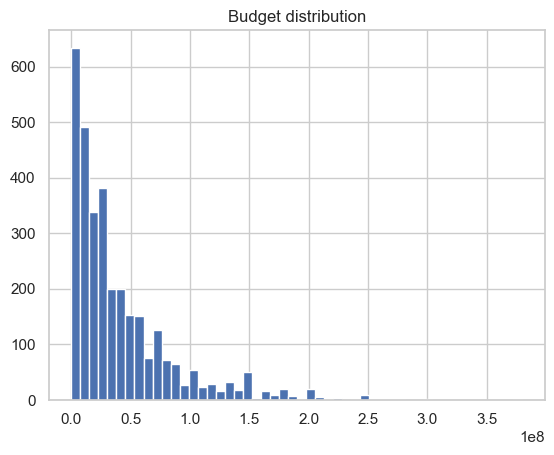

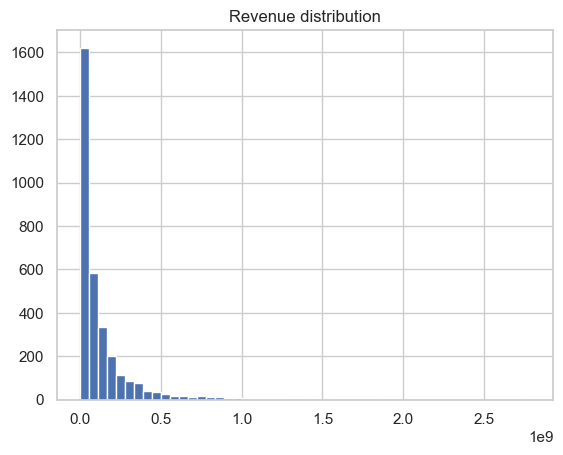

In [66]:
#Checking data for skewness
df_clean['budget'].hist(bins=50)
plt.title("Budget distribution")
plt.show()

df_clean['revenue'].hist(bins=50)
plt.title("Revenue distribution")
plt.show()



#Data above shows it is very skewed and thus we have to use log transformation to the compress the extreme values 

##Then we will have data that we can analyze. This we will do in the next part below.

count    3.229000e+03
mean     1.212430e+08
std      1.863029e+08
min      5.000000e+00
25%      1.700000e+07
50%      5.518472e+07
75%      1.462920e+08
max      2.787965e+09
Name: revenue, dtype: float64


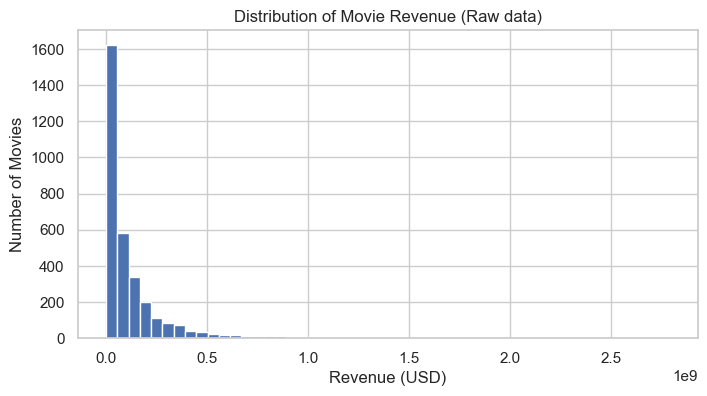

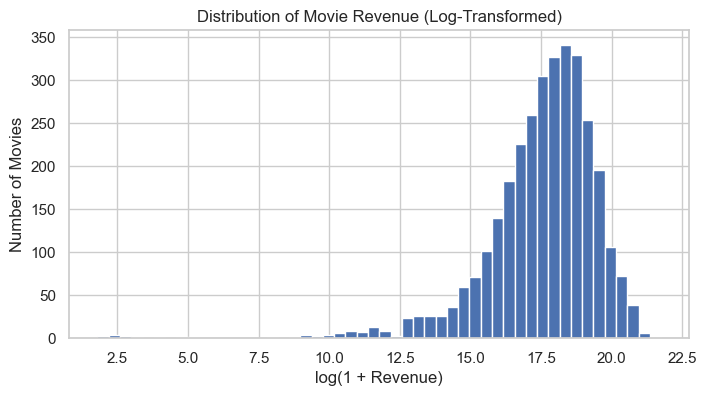

Revenue: 2,787,965,087 | Log Revenue: 21.75
Revenue:  961,000,000 | Log Revenue: 20.68
Revenue:  880,674,609 | Log Revenue: 20.60
Revenue: 1,084,939,099 | Log Revenue: 20.80
Revenue:  284,139,100 | Log Revenue: 19.46
Revenue:  890,871,626 | Log Revenue: 20.61
Revenue:  591,794,936 | Log Revenue: 20.20
Revenue: 1,405,403,694 | Log Revenue: 21.06
Revenue:  933,959,197 | Log Revenue: 20.65
Revenue:  873,260,194 | Log Revenue: 20.59


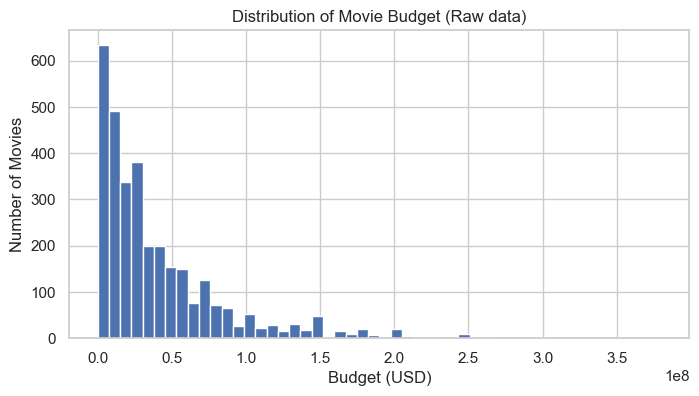

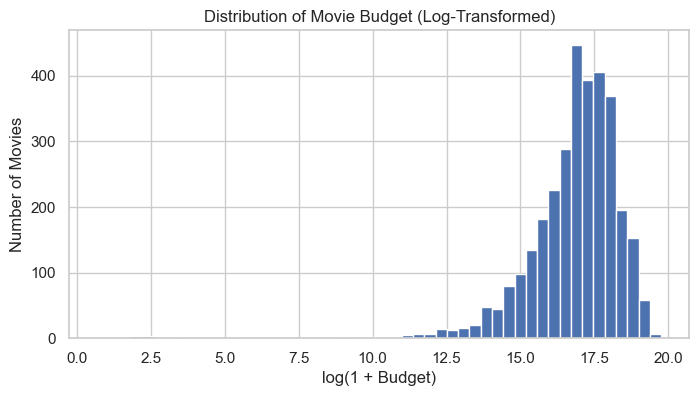

Budget:  237,000,000  |  Log Budget: 19.28
Budget:  300,000,000  |  Log Budget: 19.52
Budget:  245,000,000  |  Log Budget: 19.32
Budget:  250,000,000  |  Log Budget: 19.34
Budget:  260,000,000  |  Log Budget: 19.38
Budget:  258,000,000  |  Log Budget: 19.37
Budget:  260,000,000  |  Log Budget: 19.38
Budget:  280,000,000  |  Log Budget: 19.45
Budget:  250,000,000  |  Log Budget: 19.34
Budget:  250,000,000  |  Log Budget: 19.34

Number of movies with revenue less than 10 million: 556
Number of movies with revenue more than 1 billion: 21


In [67]:


# Ensures that the data type is numeric for revenue and budget
df_clean['revenue'] = pd.to_numeric(df_clean['revenue'], errors='coerce')
df_clean['budget'] = pd.to_numeric(df_clean['budget'], errors='coerce')

# Replace NaN with 0 
df_clean['revenue'] = df_clean['revenue'].fillna(0)
df_clean['budget'] = df_clean['budget'].fillna(0)

# Summary of revenue
print(df_clean['revenue'].describe())

# Histogram revenue (raw data)
df_clean['revenue'].hist(bins=50, figsize=(8,4))
plt.title("Distribution of Movie Revenue (Raw data)")
plt.xlabel("Revenue (USD)")
plt.ylabel("Number of Movies")
plt.show()

# Histogram revenue (log-transformed data)
df_clean['log_revenue'] = np.log1p(df_clean['revenue'])
df_clean['log_revenue'].hist(bins=50, figsize=(8,4))
plt.title("Distribution of Movie Revenue (Log-Transformed)")
plt.xlabel("log(1 + Revenue)")
plt.ylabel("Number of Movies")
plt.show()

# Checks mapping raw vs log for revenue
for i, row in df_clean[['revenue', 'log_revenue']].head(10).iterrows():
    print(f"Revenue: {row['revenue']: >12,.0f} | Log Revenue: {row['log_revenue']:.2f}")

# Histogram budget (with raw data)
df_clean['budget'].hist(bins=50, figsize=(8,4))
plt.title("Distribution of Movie Budget (Raw data)")
plt.xlabel("Budget (USD)")
plt.ylabel("Number of Movies")
plt.show()

# Histogram budget (log-transformed data)
df_clean['log_budget'] = np.log1p(df_clean['budget'])
df_clean['log_budget'].hist(bins=50, figsize=(8,4))
plt.title("Distribution of Movie Budget (Log-Transformed)")
plt.xlabel("log(1 + Budget)")
plt.ylabel("Number of Movies")
plt.show()

# Checks mapping raw vs log for budget
for i, row in df_clean[['budget','log_budget']].head(10).iterrows():
    print(f"Budget: {row['budget']:>12,.0f}  |  Log Budget: {row['log_budget']:.2f}")

# adding blank space for separating output from mapping budget-log budget and comparison of revenue counts
print()

# Comparison of revenue counts
print("Number of movies with revenue less than 10 million:", (df_clean['revenue'] < 1e7).sum())
print("Number of movies with revenue more than 1 billion:", (df_clean['revenue'] > 1e9).sum())

##### From the comparisons between the small and big revenue movies, we can see a very skewed distribution. Small movies (556 in total) make less than 10 million USD, whereas very few big movies make over 1 billion USD (21 in total). To make the model learn from this data would be difficult and therefore we opt for log transforming our target variable, revenue. By log transformation it will be easier for our model to learn from the data. With log transforming we have now created a more "normal" distribution model that makes it easier to use for our regression model. Also, the feature 'budget' is also log-transformed because it is also heavily skewed and hurts the regression model. With log-transforming with too the relationship with revenue will be more linear. 

## 3.Feature Engineering 

In [5]:
# 3.1 Revenue distribution analysis

### 3.1. Revenue Distribution Analysis

In [47]:
!pip install scikit-learn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Ensures conversion to numeric types
df_clean['budget'] = pd.to_numeric(df_clean['budget'], errors='coerce')
df_clean['revenue'] = pd.to_numeric(df_clean['revenue'], errors='coerce')

#since release_date is stored as a string in the dataset, we must convert it to numeric to make it comparable across decades ('release_year') and summer and winters ('release_month')
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], errors='coerce')


df_clean['release_year'] = df_clean['release_date'].dt.year
df_clean['release_month'] = df_clean['release_date'].dt.month

# Create log-transformed columns
df_clean['log_budget'] = np.log1p(df_clean['budget'])   # the log(1+x) avoids log(0) issues
df_clean['log_revenue'] = np.log1p(df_clean['revenue'])

#The target variable (y) - log-transformed
y = df_clean['log_revenue'] 

# Feature set - the features we believe are affecting movie revenue
features = ['log_budget', 'runtime', 'popularity', 'vote_average',
            'vote_count', 'release_year', 'release_month']

X = df_clean[features]

print("Features ready:", X.shape, "Target ready:", y.shape)


Features ready: (3229, 7) Target ready: (3229,)


## 4.Train-test split 

In [49]:
from sklearn.model_selection import train_test_split

# 20% of the data is test data (the data to evaluate performance)
# 80% of the data is training data (the data that is used to fit the model)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# This checks that the sizes are correct when printed
print("Test set size data:", X_test.shape[0], "movies")
print("Training set size data:", X_train.shape[0], "movies")

Test set size data: 646 movies
Training set size data: 2583 movies


## 5.Machine Learning Models

### 5.1. Baseline: Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating the linear regression model
lin_reg = LinearRegression() 

# Training the model to learn from viewing the training data, which is 80% of the data.
lin_reg.fit(X_train, y_train)

# Predicting the results. The trained model is now applied on the test data, which 20% of the data that the model never seen.
# The result of this is how good is the model at predicting on unseen data.
y_pred = lin_reg.predict(X_test)

# Evaluating the model. RMSE - Root Mean Square Error is how far off on average the predictions are in the model.
# Keep in mind that we use log(revenue) and thus 1.5 in RMSE is about 4-5x off from average. More on this below.
# R2 - R squared is defined as how much of the variation in the revenue (target variable) is explained by the model. 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 5. Print results
print(f"Linear Regression → RMSE: {rmse:.4f}")
print(f"Linear Regression → R²: {r2:.4f}")

Linear Regression → RMSE: 1.4995
Linear Regression → R²: 0.4630


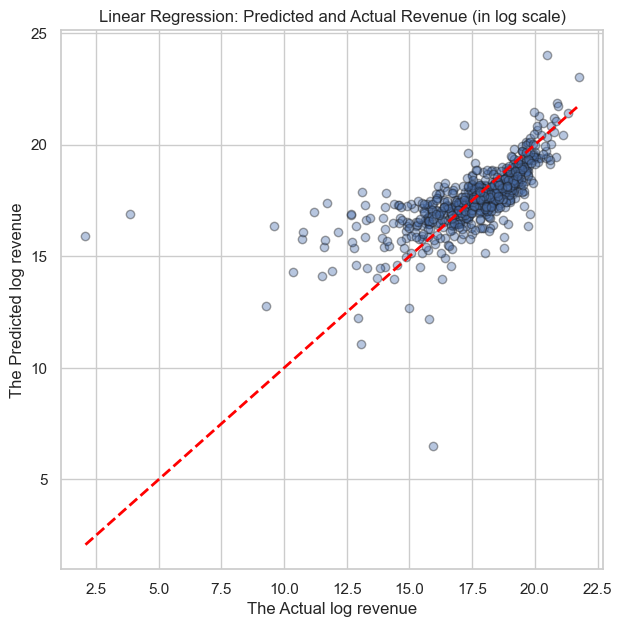

In [51]:
import matplotlib.pyplot as plt

# Scatterplot
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolor="k")

# Perfect prediction line in the scatterplot
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", lw=2)

plt.xlabel("The Actual log revenue")
plt.ylabel("The Predicted log revenue")
plt.title("Linear Regression: Predicted and Actual Revenue (in log scale)")
plt.show()

In [ ]:
### Comments R2: 0.4630: The Linear Regression model explains approximately 46% of the variation in the target variable (that is, the log-transformed revenue variable).
### In other words, half of the differences in movie revenues can be explain by the features we chose in our model, while the remaining 54% is explain by factors outside of the model
### Comments RMSE: 1.4995: while it is more complex to interpret this number in the context of the question we have about revenue, 
### we can argue that the model is off by 1.5 log points on average from true log revenue (the average size error between predicted and actual values). 
### The precision is not quite high and what this means for the data is that predicitions are off by 4 or 5x on average, which can 
### be acceptable for small movies. But with large blockbuster movies in the multi-million to billion dollars category, the deviation from average suggest that the gap is too large because 
### the difference may be in the hundreds of millions of USD. 


#### Comments on the scatterplot: the more points (one point=one movie) on the red line the better the model is. However, as can be seen there several points far away 
#### from the model and scattered on upper-left and lower-right. 

### 5.2. Random Forest

In [9]:
## Random Forest is regarded as a stronger model than Linear Regression because it can 
##- a) capture non-linear relationships, 
##- b) is well-suited for tabular data like the movie dataset and 
##- c) it creates several decision trees and its predictions are averaged.

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Creating the model
rf = RandomForestRegressor(
    n_estimators=300, # the number of trees created
    max_depth=15, # the control tree depth
    random_state=42, # random state
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions
y_pred_log = rf.predict(X_test)

# Evaluation of the model in log space
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)

print(f"Random Forest - R² (log space): {r2_log:.3f}")
print(f"Random Forest - RMSE (log space): {rmse_log:.3f}")

# For interpretation, the predictions are converted back to real revenue in USD
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Random Forest - RMSE (USD): ${rmse_actual:,.0f}")

Random Forest - R² (log space): 0.611
Random Forest - RMSE (log space): 1.277
Random Forest - RMSE (USD): $126,053,523


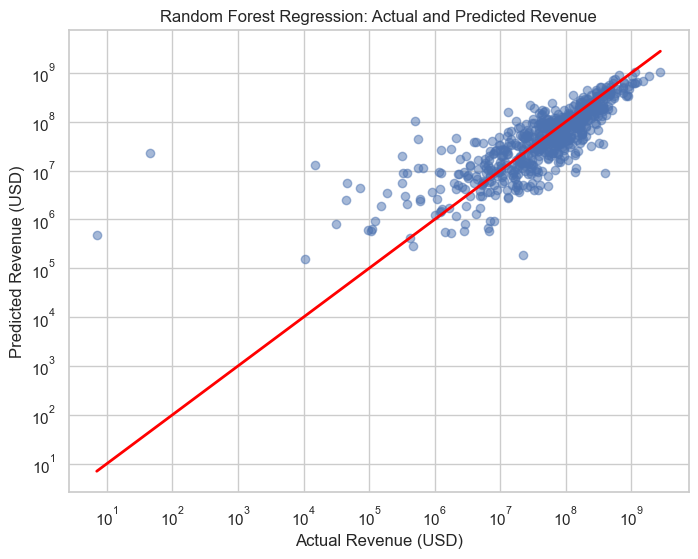

In [53]:
# Plot of Random Forest results
plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color='red', lw=2)  # the perfect prediction line in the plot

plt.xlabel("Actual Revenue (USD)")
plt.ylabel("Predicted Revenue (USD)")
plt.title("Random Forest Regression: Actual and Predicted Revenue")
plt.xscale("log")
plt.yscale("log")
plt.show()




In [ ]:
### 5.4. Comparing results

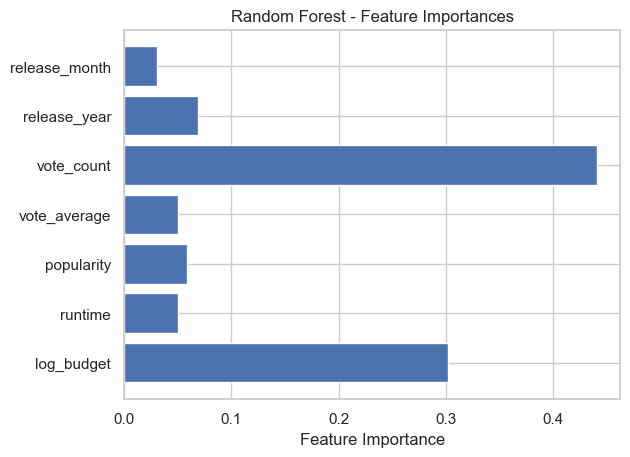

In [54]:
# Feature Importance Plot: explaining why the Random forest model is predicting like it does
importances = rf.feature_importances_
feat_names = X.columns

plt.barh(feat_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.show()



### Comments on the results from the Random Forest model and feature importance:
- Random Forest - R² (log space): 0.611 - this means that the Random Forest model explains 61% of the variation in log-revenue 
which is an improvement with 15% over the Linear Regression model (0.46 or 46%). The predicitions in the Random forest model is on average off by $126 million USD, which seems to be large but considering the large movie revenue span range from few million to billions, it is reasonable. 
- Feature importance in the Random Forest model:
- vote_count ≈ 0.45+
- log_budget ≈ 0.30
- Others < 0.10
- Summary: vote_count (the user ratings count on TMDB) is the strongest predictor of revenue. This makes sense since movies that are popular and many people watch get more votes. The second strongest predictor, log_budget, entails bigger production, more famous actors and marketing and therefore more revenue, but not all of them make money. The other features were not strong predictors and cannot explain the movie revenue.


### 5.3. Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,    # number of boosting stages (or trees). 
    learning_rate=0.05,  # shrinkage rate (how much the trees will influence the final prediction. Small values is more gradual and stable)
    max_depth=5,         # the depth of individual trees, which controls the complexity
    random_state=42      # makes reproducibility possible
)

# this trains the model
gbr.fit(X_train, y_train)

# makes the prediction on the test data, which this model has not seen before.
y_pred_gbr = gbr.predict(X_test)

# Evaluation of the model in log space. 
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - R² (log space): {r2_gbr:.3f}")
print(f"Gradient Boosting - RMSE (log space): {rmse_gbr:.3f}")

# This transform back from log scale to real USD for interpretation
y_pred_actual_gbr = np.expm1(y_pred_gbr)
rmse_actual_gbr = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual_gbr))
print(f"Gradient Boosting - RMSE (USD): ${rmse_actual_gbr:,.0f}")

Gradient Boosting - R² (log space): 0.591
Gradient Boosting - RMSE (log space): 1.309
Gradient Boosting - RMSE (USD): $124,654,656


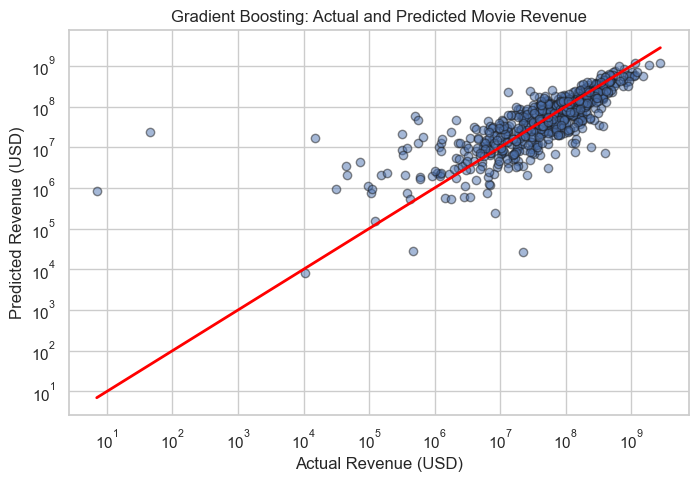

In [58]:
# Scatter plot over the Gradient boosting model for Actual and Predicted Revenue
plt.figure(figsize=(8,5))
plt.scatter(y_test_actual, y_pred_actual_gbr, alpha=0.5, edgecolor='k')

# Perfect prediction line (y = x)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color='red', lw=2)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Actual Revenue (USD)")
plt.ylabel("Predicted Revenue (USD)")
plt.title("Gradient Boosting: Actual and Predicted Movie Revenue")
plt.show()

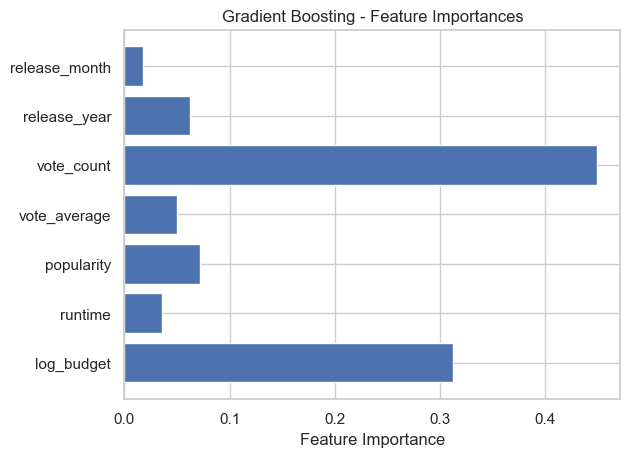

In [59]:
importances_gbr = gbr.feature_importances_
feat_names = X.columns

plt.barh(feat_names, importances_gbr)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting - Feature Importances")
plt.show()

### Comments on the results from the Gradient Boost model and feature importance:
- Gradient Boosting - R² (log space): 0.591: the Gradient Boosting model explains about 59% of the variation in log-revenue 
which is an improvement with 13% over the Linear Regression model (0.46 or 46%) but it it less than the Random Forest model (61%). The predictions in the Random forest model is on average off by $125 million USD.
- Feature importance in the Random Forest model:
- vote_count ≈ 0.45+
- log_budget ≈ 0.30
- Others < 0.10
- Summary: As in the Random forest model, vote_count (the user ratings count on TMDB) is the strongest predictor of revenue. This makes sense since movies that are popular and many people watch get more votes. The second strongest predictor, log_budget, is the second strongest is explainable due to the bigger budget the more money is made although it is not always necessary that a big movie will be profitable.

## 5.4.Model Comparison and Conclusion

In [61]:

import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "R² (log space)": [0.46, 0.61, 0.59],
    "RMSE (USD)": ["Higher error", "$126M", "$125M"]
})

print(results)


               Model  R² (log space)    RMSE (USD)
0  Linear Regression            0.46  Higher error
1      Random Forest            0.61         $126M
2  Gradient Boosting            0.59         $125M


**Model comparison**
As can be seen, the Random Forest Model performed the best by explaining 61% of the variation in the log-transformed revenue, and an average error of 126 million USD per movie. Not far away from this prediciton was the Gradient Boosting Model at 59% explanation of the variaton. In summary, the tree-based and non-linear methods of Random Forest and Gradient Boosting outperformed Linear Regression for predicting movie revenue. This means that these models can better capture the complexity of box office data. 

**Limitiations:**
- A limitation is the data quality: several features like distribution, marketing, number of screens and cast effects are not included but could possibly affect the data.
- Predictive power: the strongest model could explain 61% of the variation, which leaves almost 40% of the variation unexplained due to factors not included in the model.
- Missing external validation: this was only tested on the TMDB dataset which limits the validation of results.
- The strongest predictor 'vote_count': there is ambiguity in whether this predictor may reflect the audience popularity after the movie has been released (post-release popularity). This makes its pre-release predictive power questionable.   

**Conclusion:**
The purpose of this project was to predict box office movie success, which was made by trying to explain our target variable movie revenue. How much revenue a movie has made is the the determinant for success. From the models analyzed we can argue that vote count is the strongest predictor for movie revenue. And also, not far from the feature, the budget of the movie is also fairly good at predicting the success of a movie. Other features, like release year and month, vote average, popularity and runtime are negligble in the models we have tested. 



### 6.Future work 

1. **Improve data quality**
- Include more movie datasets for improving the features and missing values.

2. **Model enhancements**
- Improve the Random Forest and Gradient Boosting models by tuning hyperparameters with RandomizedSearchCV or GridSearchCV.

3. **Improving evaluation**
- for more robust model performance estimations, cross-validations are preferable and evalute the model across various movie segments (e.g. low-budget versus high budget/blockbusters across different genres).

4. **For business applications**
- Make a framework for pre-release revenue prediction that excludes 'vote_count' that is post-release data.
